<a href="https://colab.research.google.com/github/nishikantmandal007/Hand_written_digit_recognizer/blob/main/Handwritten_digit_recognisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

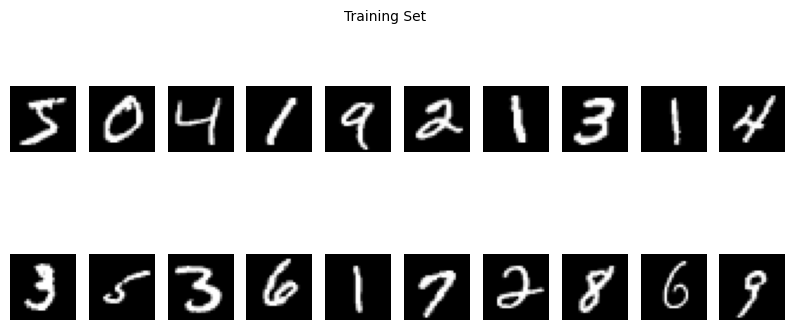

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 - 6s - loss: 0.2295 - accuracy: 0.9321 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.0995 - accuracy: 0.9690 - 4

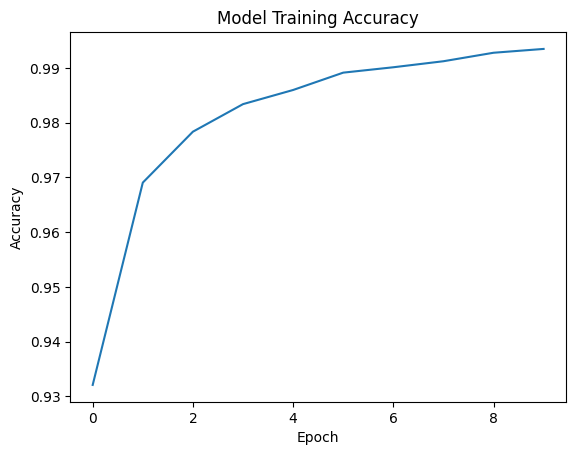

313/313 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9788
Test accuracy: 0.9787999987602234


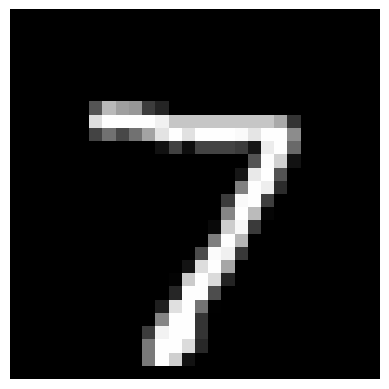

1/1 [==============================] - 0s 62ms/step
The result is : 7


In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Show a sample of training images
fig, axes = plt.subplots(2, 10, figsize=(10, 4))
fig.suptitle('Training Set', fontsize=10)
axes = axes.ravel()
for i in range(20):
    axes[i].imshow(train_images[i], cmap='gray')
    axes[i].axis('off')
plt.show()

# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model and track the accuracy history
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs, verbose=2)

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Test with an image and print the prediction
image_index = 0
test_image = test_images[image_index]
plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.show()

prediction = model.predict(test_image.reshape(1, 28, 28))
predicted_label = prediction.argmax()
print('The result is :', predicted_label)
